In [17]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import matplotlib as mlb
import pandas as pd
import datetime
import scipy as sp
import scipy.fftpack
import csv
import math
import os

%matplotlib inline

In [18]:
df = pd.read_csv("./20170306_222833/body.csv", sep=',', header=0)

In [19]:
df

,datetime,isTracking,leftHandX,leftHandY,RightHandX,RightHandY,LeanX,LeanY
0,2017-03-06 22:28:35,A,579,946,870,956,-0.024710,-0.003632
1,2017-03-06 22:28:35,A,597,958,931,921,-0.156017,-0.762499
2,2017-03-06 22:28:35,A,598,959,934,919,-0.106341,-0.977149
3,2017-03-06 22:28:36,A,598,959,933,920,-0.097270,-1.000000
4,2017-03-06 22:28:36,A,595,946,937,922,-0.066060,-1.000000
5,2017-03-06 22:28:36,A,595,944,938,920,-0.070651,-1.000000
6,2017-03-06 22:28:36,A,610,947,937,920,-0.091657,-0.951367
7,2017-03-06 22:28:36,A,608,943,945,914,-0.128502,-0.836174
8,2017-03-06 22:28:36,A,594,958,908,947,-0.168923,-0.687499
9,2017-03-06 22:28:36,A,574,957,965,914,-0.304793,-0.052885


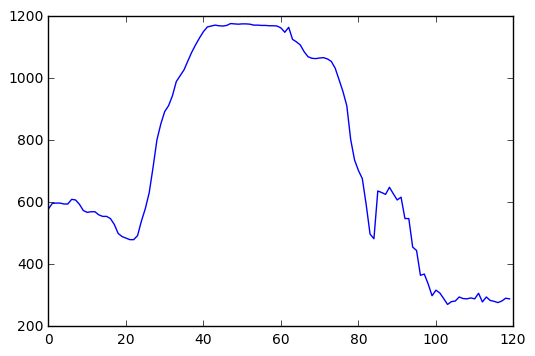

In [20]:
plt.figure()
plt.plot(df['leftHandX'])

In [22]:
df.index = pd.to_datetime(df['datetime'], unit='s')
sampled = df['leftHandX'].resample('1s', how='mean')

In [30]:
df

,datetime,isTracking,leftHandX,leftHandY,RightHandX,RightHandY,LeanX,LeanY
datetime,,,,,,,,
2017-03-06 22:28:35,2017-03-06 22:28:35,A,579,946,870,956,-0.024710,-0.003632
2017-03-06 22:28:35,2017-03-06 22:28:35,A,597,958,931,921,-0.156017,-0.762499
2017-03-06 22:28:35,2017-03-06 22:28:35,A,598,959,934,919,-0.106341,-0.977149
2017-03-06 22:28:36,2017-03-06 22:28:36,A,598,959,933,920,-0.097270,-1.000000
2017-03-06 22:28:36,2017-03-06 22:28:36,A,595,946,937,922,-0.066060,-1.000000
2017-03-06 22:28:36,2017-03-06 22:28:36,A,595,944,938,920,-0.070651,-1.000000
2017-03-06 22:28:36,2017-03-06 22:28:36,A,610,947,937,920,-0.091657,-0.951367
2017-03-06 22:28:36,2017-03-06 22:28:36,A,608,943,945,914,-0.128502,-0.836174
2017-03-06 22:28:36,2017-03-06 22:28:36,A,594,958,908,947,-0.168923,-0.687499


In [24]:
sampled

datetime
2017-03-06 22:28:35     591.333333
2017-03-06 22:28:36     585.636364
2017-03-06 22:28:37     514.090909
2017-03-06 22:28:38     850.454545
2017-03-06 22:28:39    1140.909091
2017-03-06 22:28:40    1173.416667
2017-03-06 22:28:41    1112.416667
2017-03-06 22:28:42     883.083333
2017-03-06 22:28:43     588.545455
2017-03-06 22:28:44     331.846154
2017-03-06 22:28:45     288.000000
2017-03-06 22:28:46     289.000000
Freq: S, Name: leftHandX, dtype: float64

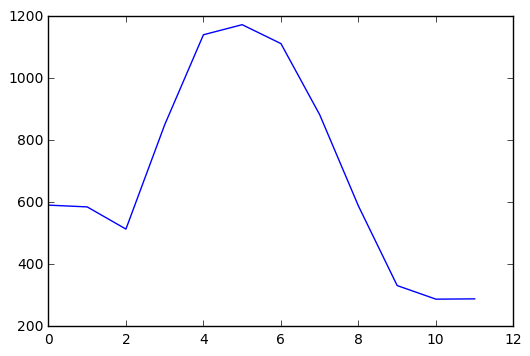

In [31]:
plt.figure()
plt.plot(sampled)

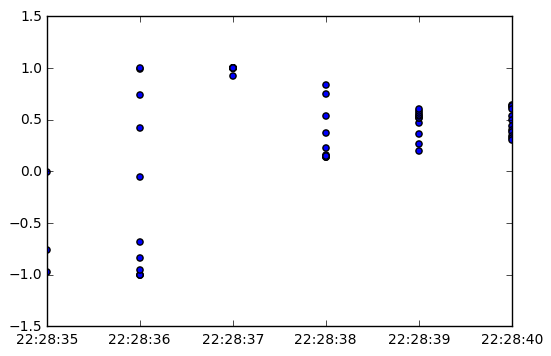

In [36]:
# SCATTER PLOT
plt.figure()
plt.scatter(df.index, df['LeanY'])
plt.xlim(['2017-03-06 22:28:35','2017-03-06 22:28:40'])
plt.show()

In [ ]:
# ファイル出力
plt.savefig('/usr/local/apache2/htdocs/test/test2.png')